# **Import**

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# new libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

# **Dataset**

https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv

In [4]:
#Load in data
df = pd.read_csv('/content/cust_seg (2).csv')

In [5]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [7]:
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [8]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [9]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 150 missing values.


In [10]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [11]:
## Print the unique values for the column
print(df['Defaulted'].unique())

[ 0.  1. nan]


- Proceeded without the "Defaulted" column due to NAN value error code that conflicts with Sci-Kit Learn for some reason. We can leave for discussion. 

# **Objective**

Perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

In [12]:
# Define the columns

x = df[['Age','Edu','Years Employed','Income','Card Debt','Other Debt','Defaulted','DebtIncomeRatio']]

In [13]:
x.dropna(subset=['Defaulted'], inplace=True)
x.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [14]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_x = scaler.fit_transform(x)

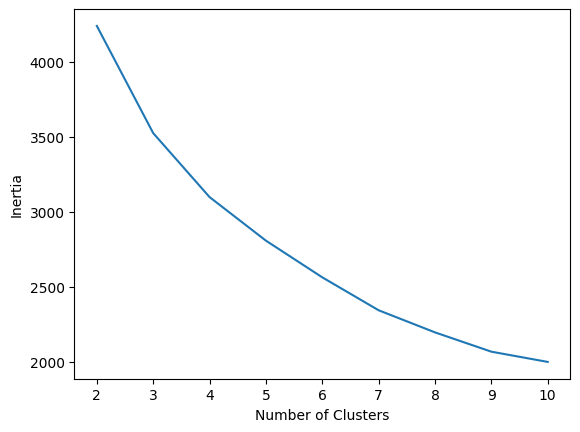

In [15]:
# Define a range of values of k to evaluate for inertia and empty list
ks = range(2, 11)
inertias = []

# for each value for k
for k in ks:
  
  # Fit and run the model,
  km = KMeans(n_clusters=k)
  km.fit(scaled_x)
  inertias.append(km.inertia_)

# Plot the results
plt.plot(ks, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show() 

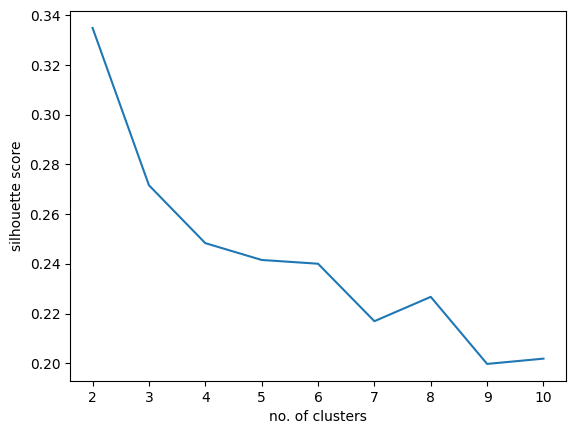

In [16]:
# define a range of values of k to evaluate for silhouette score and empty list
ks = range(2, 11)
sils = []


# for each value for k
for k in ks:

  # fit and run the model,
  km = KMeans(n_clusters=k)
  km.fit(scaled_x)
  sils.append(silhouette_score(scaled_x, km.labels_))



# and plot the results
plt.plot(ks, sils)
plt.xlabel('no. of clusters')
plt.ylabel('silhouette score')
plt.show() 

# **Final Model and Clustering Dataset**

In [17]:
# Instantiate a KMeans model with the value for k based on elbow plot method 
# and silhouette score
km = KMeans(n_clusters=2, random_state=42)
km.fit(scaled_x)

KMeans(n_clusters=2, random_state=42)

In [18]:
# Add a column to the dataframe to add the cluster label as you fit and predict x 
x['cluster'] = km.labels_

In [19]:
# Examine your dataframe with .head()
x.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


- I choose Silhouette Score for K as cluster 2 displays the highest score.